# The t-Distribution <hr style="border: 2.5px solid #fa6194ff"></hr>

<b> Elyssa C. Tombale </b>
<br> T09-A </br>

In [13]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [14]:
#Load Dataset
df = pd.read_csv(r"dataset/transformer-voltage-10-sample.csv",
                    delimiter=",",
                    index_col=["Sample"])
df

,Voltage
Sample,
1,118.3
2,119.2
3,119.7
4,119.5
5,120.0
6,120.1
7,120.2
8,120.8
9,121.5


In [15]:
#sumarry of Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Voltage  10 non-null     float64
dtypes: float64(1)
memory usage: 160.0 bytes


In [16]:
#summary of statistics
df.describe()

,Voltage
count,10.000000
mean,120.110000
std,1.050344
min,118.300000
25%,119.550000
50%,120.050000
75%,120.650000
max,121.800000


In [17]:
# t-critical for two-tailed test
alpha = 0.05
n = df['Voltage'].count()

t_critical = stats.t.ppf(1-alpha/2,n-1)
t_critical

np.float64(2.2621571628540993)

In [18]:
#confidence interval
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

ci_lower, ci_upper = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean,
    scale = std/np.sqrt(n)
)

print(f"CI: [{ci_lower:.2f} to {ci_upper:.2f}]")

CI: [119.36 to 120.86]


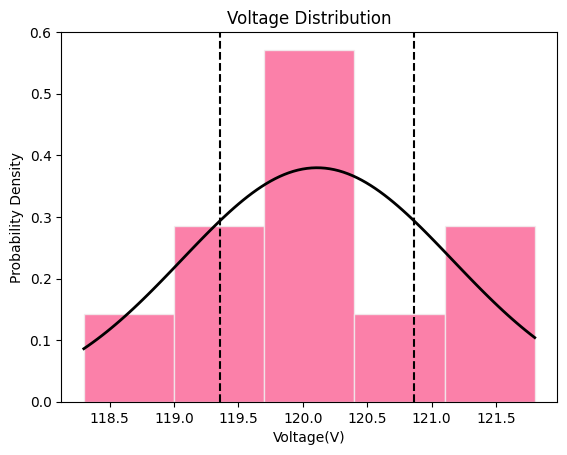

In [19]:
#voltage distribution
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

#x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

#normal distribution
x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, df['Voltage'].mean(), df['Voltage'].std(ddof= 1))

plt.plot(x,p,
        color = 'black',
        linewidth = 2)

#histogram plot
plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha= 0.8,
         color= '#fa6194ff' ,
         edgecolor= "#f0f0f0ff")

plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage(V)')

#confidence interval
plt.axvline(x = ci_lower,
            color="#000000ff",
            linestyle='--')
plt.axvline(x = ci_upper,
            color= "#000000ff",
            linestyle='--')
plt.show()